## Comparacion de velocidades maximas por equipo

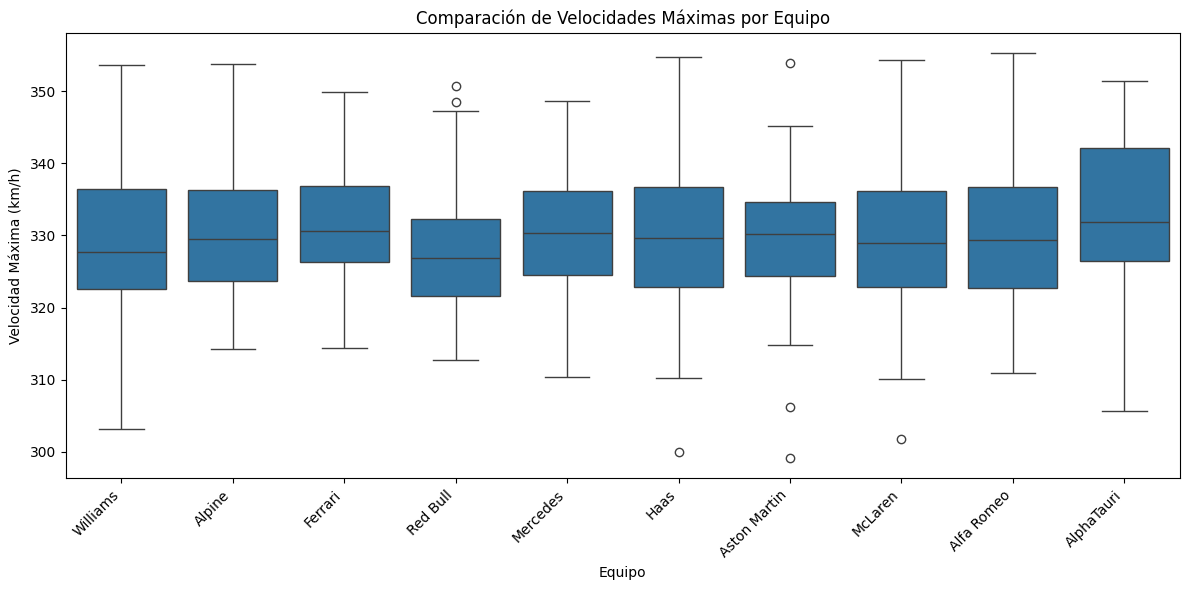

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as st
from scipy.stats import norm 
from scipy.stats import chi2
import matplotlib.pyplot as plt
import seaborn as sns

f1 = pd.read_csv('formula1_enhanced_data.csv')

plt.figure(figsize=(12, 6))
sns.boxplot(x='Team', y='MaxSpeed', data=f1)
plt.title('Comparación de Velocidades Máximas por Equipo')
plt.xlabel('Equipo')
plt.ylabel('Velocidad Máxima (km/h)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### Relacion entre el tiempo de pit stop y puntos obtenidos 

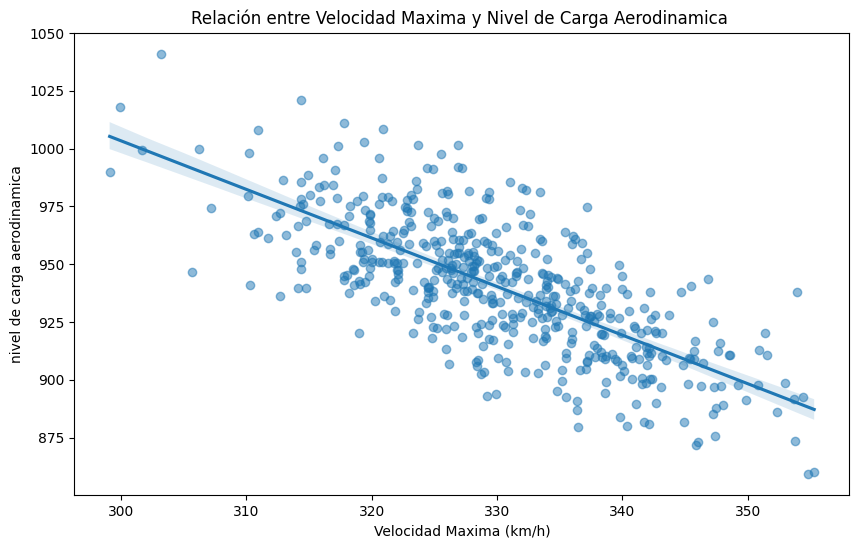


Correlación entre la Velocidad Maxima y Nivel de Carga aerodinamica: -0.7238


In [4]:
plt.figure(figsize=(10, 6))
sns.regplot(x='MaxSpeed', y='DownforceLevel', data=f1, scatter_kws={'alpha':0.5})
plt.title('Relación entre Velocidad Maxima y Nivel de Carga Aerodinamica ')
plt.xlabel('Velocidad Maxima (km/h)')
plt.ylabel('nivel de carga aerodinamica')
plt.show()

correlation = f1['MaxSpeed'].corr(f1['DownforceLevel'])
print(f"\nCorrelación entre la Velocidad Maxima y Nivel de Carga aerodinamica: {correlation:.4f}")

#### Distribucion de adelantamientos por circuitos

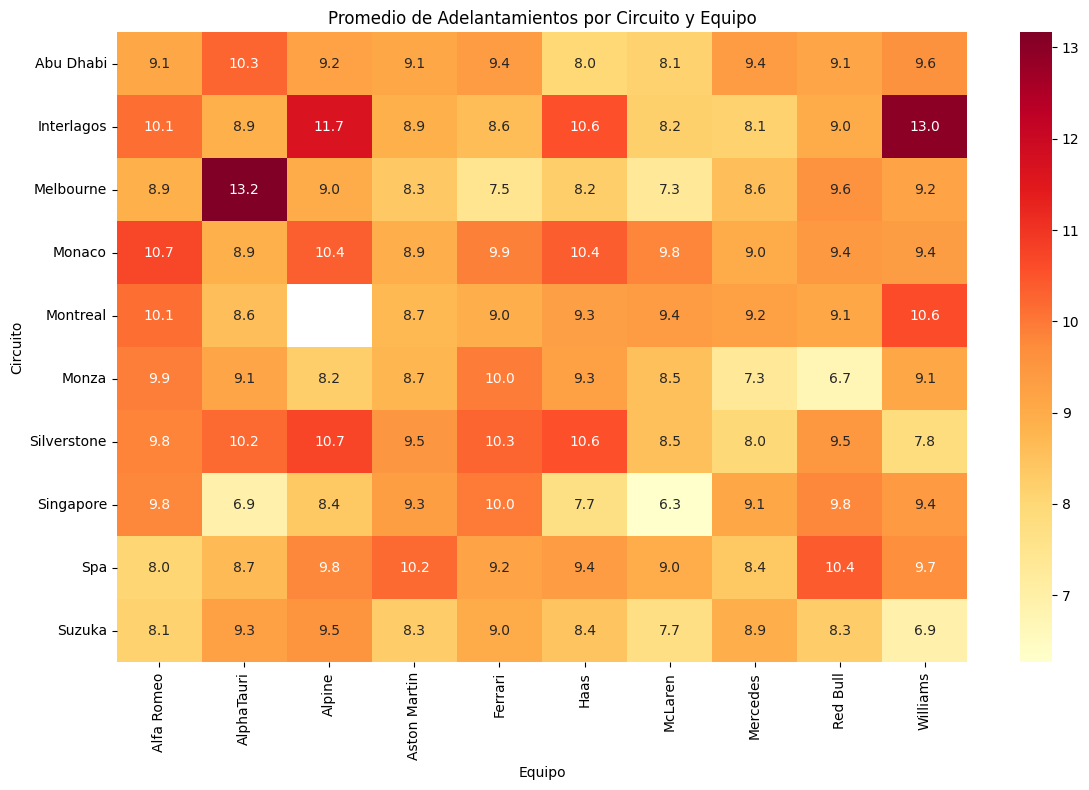

In [5]:
overtakes_by_circuit = f1.pivot_table(values='Overtakes', index='Circuit', columns='Team', aggfunc='mean')
plt.figure(figsize=(12, 8))
sns.heatmap(overtakes_by_circuit, annot=True, cmap='YlOrRd', fmt='.1f')
plt.title('Promedio de Adelantamientos por Circuito y Equipo')
plt.xlabel('Equipo')
plt.ylabel('Circuito')
plt.tight_layout()
plt.show()

#### Evolución de los tiempos de reacción a lo largo del tiempo (Line plot)

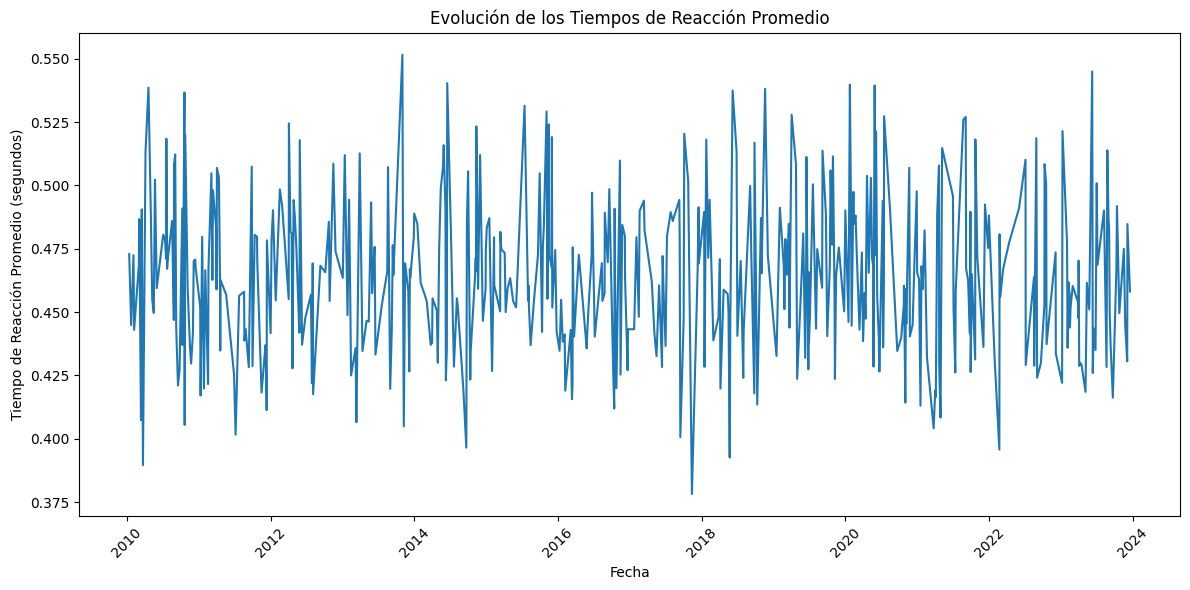

In [6]:
f1['Date'] = pd.to_datetime(f1['Date'])
reaction_times = f1.groupby('Date')['ReactionTime'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='ReactionTime', data=reaction_times)
plt.title('Evolución de los Tiempos de Reacción Promedio')
plt.xlabel('Fecha')
plt.ylabel('Tiempo de Reacción Promedio (segundos)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Velocidad maxima entre los diferentes circuitos

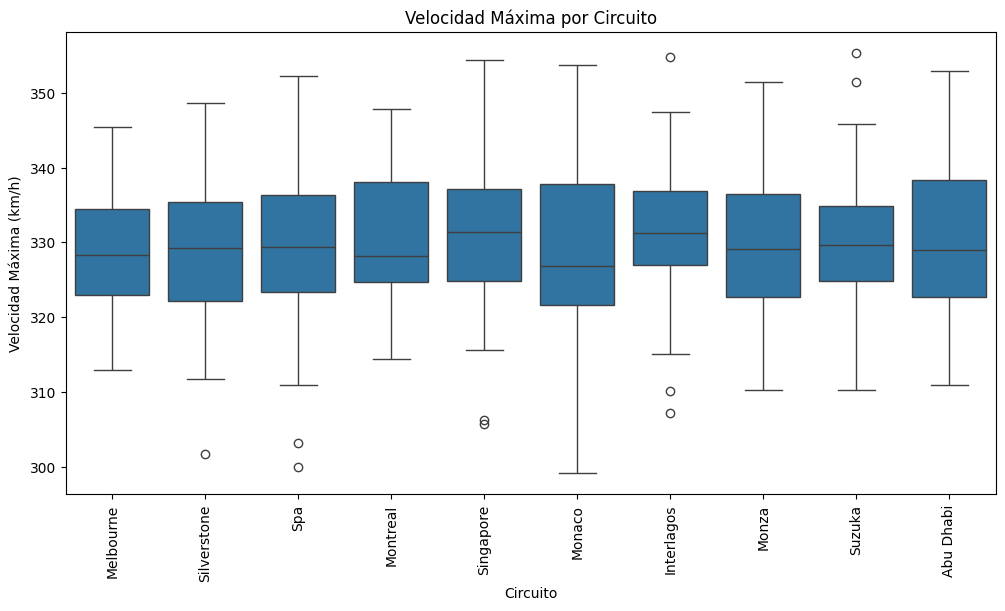


Circuito más rápido: Suzuka con velocidad máxima de 355.30 km/h


In [7]:
# 3. ¿Cómo varía la velocidad máxima entre los diferentes circuitos?
plt.figure(figsize=(12, 6))
sns.boxplot(x='Circuit', y='MaxSpeed', data=f1)
plt.title('Velocidad Máxima por Circuito')
plt.xlabel('Circuito')
plt.ylabel('Velocidad Máxima (km/h)')
plt.xticks(rotation=90)
plt.show()

# Encontrar el circuito con la velocidad máxima más alta
fastest_circuit = f1.groupby('Circuit')['MaxSpeed'].max().idxmax()
max_speed = f1.groupby('Circuit')['MaxSpeed'].max().max()
print(f"\nCircuito más rápido: {fastest_circuit} con velocidad máxima de {max_speed:.2f} km/h")

#### Probabilidad de terminar en diferentes posiciones (Pie chart)

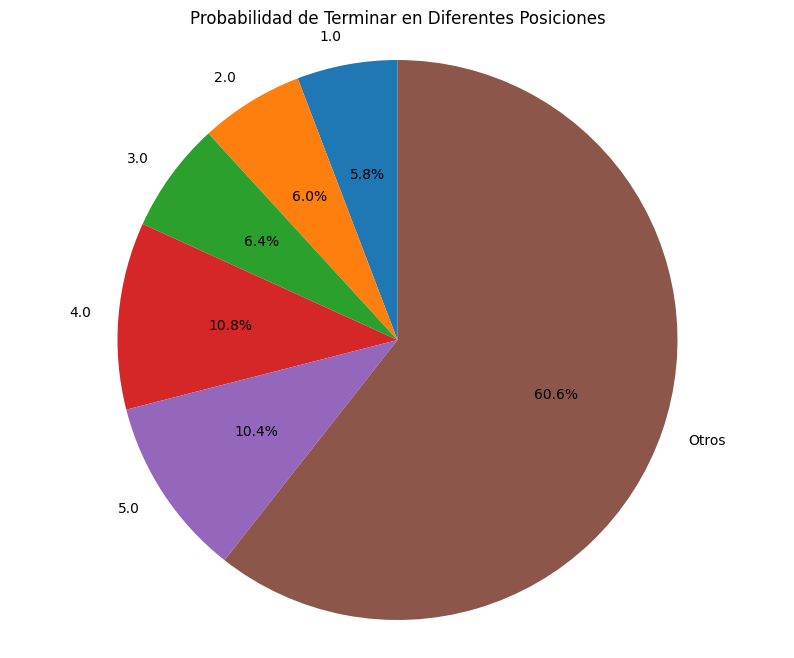


Probabilidad de terminar en cada posición:
Posición 1.0: 0.0580
Posición 2.0: 0.0600
Posición 3.0: 0.0640
Posición 4.0: 0.1080
Posición 5.0: 0.1040
Posición 6.0: 0.0940
Posición 7.0: 0.0480
Posición 8.0: 0.0340
Posición 9.0: 0.0340
Posición 10.0: 0.0040
Posición 11.0: 0.0020
Posición 20.0: 0.3900


In [8]:
position_counts = f1['FinalPosition'].value_counts().sort_index()
top_positions = position_counts.head(5)
other_positions = pd.Series({'Otros': position_counts.iloc[5:].sum()})

positions = pd.concat([top_positions, other_positions])

plt.figure(figsize=(10, 8))
plt.pie(positions, labels=positions.index, autopct='%1.1f%%', startangle=90)
plt.title('Probabilidad de Terminar en Diferentes Posiciones')
plt.axis('equal')
plt.show()

print("\nProbabilidad de terminar en cada posición:")
for position, probability in (position_counts / len(f1)).items():
    print(f"Posición {position}: {probability:.4f}")

# Lewis Hamilton y Mercedes

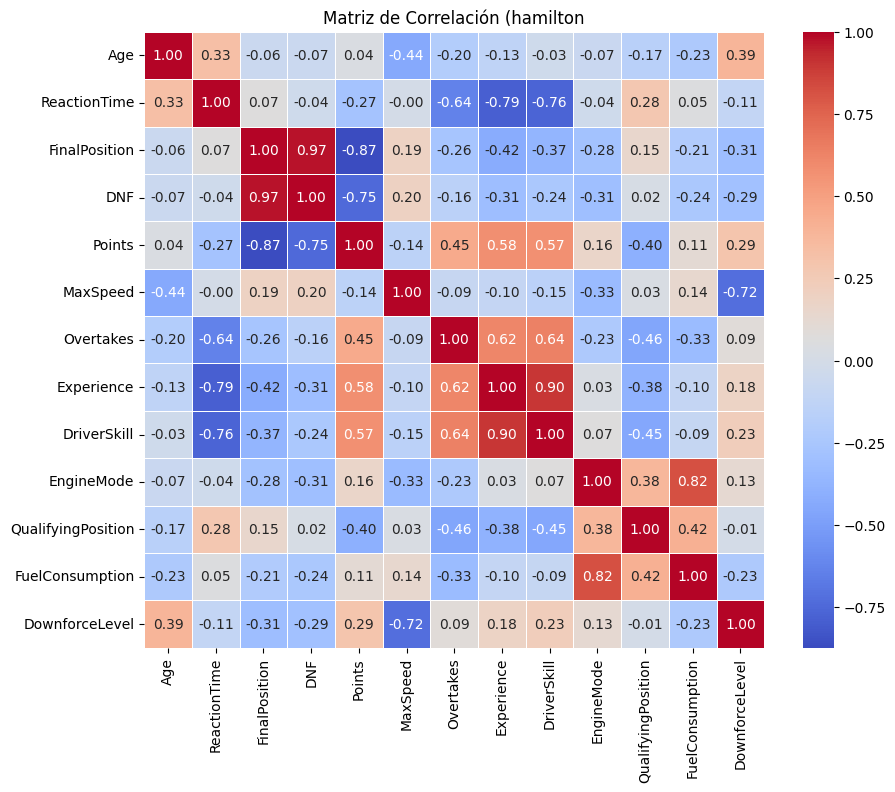

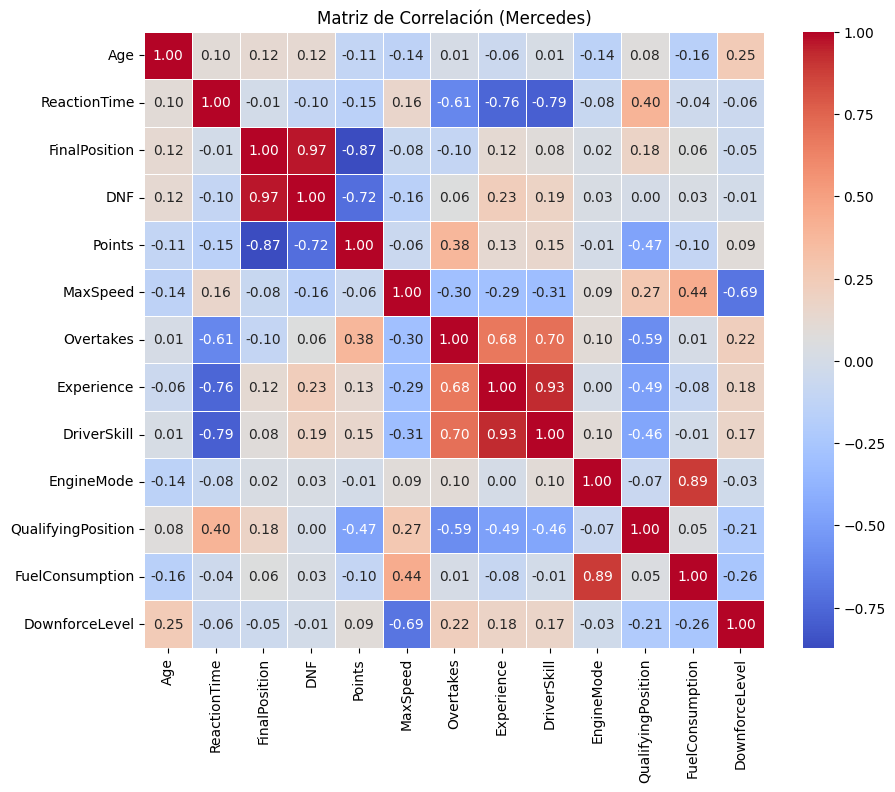

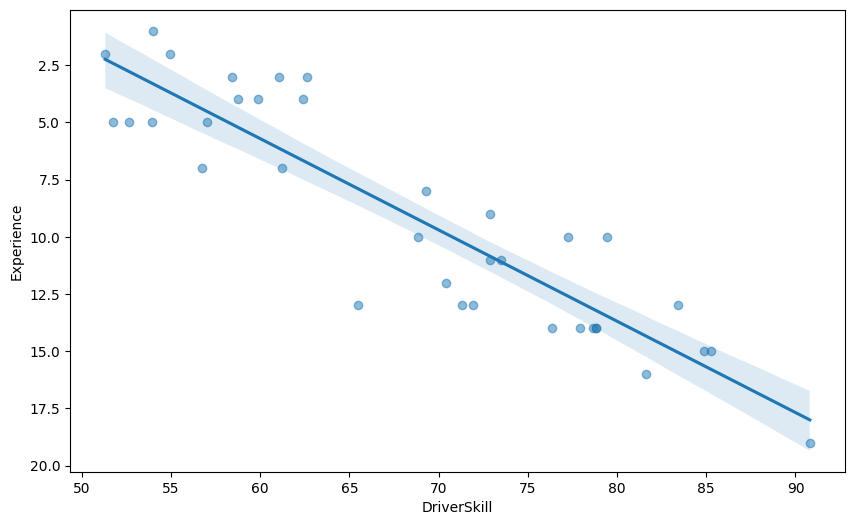

Correlación entre DriverSkill y Experience (Hamilton): 0.9042


In [20]:
# Filtrar datos para Lewis Hamilton y Mercedes
hamilton_data = f1[f1['Driver'] == 'Hamilton']
mercedes_data = f1[f1['Team'] == 'Mercedes']

columns_to_exclude = ['PitStopTime', 'TrackFamiliarity', 'TyreWear', 'CarPerformance']

# Filtrar columnas numéricas excluyendo las especificadas
numeric_columns_filtered = hamilton_data.select_dtypes(include=['number']).drop(columns=columns_to_exclude, axis=1)

# Calcular la matriz de correlación con las columnas filtradas
correlation_matrix = numeric_columns_filtered.corr()

# Crear un mapa de calor para la matriz de correlación
plt.figure(figsize=(10, 8))  # Ajustar el tamaño del gráfico
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlación (hamilton')
plt.show()

########

# Filtrar columnas numéricas excluyendo las especificadas
numeric_columns_filtered = mercedes_data.select_dtypes(include=['number']).drop(columns=columns_to_exclude, axis=1)

# Calcular la matriz de correlación con las columnas filtradas
correlation_matrix = numeric_columns_filtered.corr()

# Crear un mapa de calor para la matriz de correlación
plt.figure(figsize=(10, 8))  # Ajustar el tamaño del gráfico
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlación (Mercedes)')
plt.show()

########


def plot_figure_corr_hamilton(variable1, variable2):
    
    # 1. Correlación entre tiempo de reacción y posición final para Hamilton
        plt.figure(figsize=(10, 6))
        sns.regplot(x=variable1, y=variable2, data=hamilton_data, scatter_kws={'alpha':0.5})
        #plt.title('Correlación entre el {variable1} y su {variable2} (Hamilton)')
        plt.xlabel(variable1)
        plt.ylabel(variable2)
        plt.gca().invert_yaxis()  # Invertir eje y para que la posición 1 esté arriba
        plt.show()

        correlation = hamilton_data[variable1].corr(hamilton_data[variable2])
        print(f"Correlación entre {variable1} y {variable2} (Hamilton): {correlation:.4f}")


plot_figure_corr_hamilton('DriverSkill', 'Experience')

In [ ]:
# 3. Distribución de velocidades máximas de Mercedes por circuito
plt.figure(figsize=(12, 6))
sns.boxplot(x='Circuit', y='MaxSpeed', data=mercedes_data)
plt.title('Distribución de Velocidades Máximas de Mercedes por Circuito')
plt.xlabel('Circuito')
plt.ylabel('Velocidad Máxima (km/h)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:

# 4. Correlación entre tiempo de pit stop y puntos para Mercedes
plt.figure(figsize=(10, 6))
sns.regplot(x='PitStopTime', y='Points', data=mercedes_data, scatter_kws={'alpha':0.5})
plt.title('Correlación entre Tiempo de Pit Stop y Puntos (Mercedes)')
plt.xlabel('Tiempo de Pit Stop (segundos)')
plt.ylabel('Puntos')
plt.show()

correlation = mercedes_data['PitStopTime'].corr(mercedes_data['Points'])
print(f"\nCorrelación entre Tiempo de Pit Stop y Puntos (Mercedes): {correlation:.4f}")

# 5. Comparación de adelantamientos entre Hamilton y otros pilotos de Mercedes
mercedes_overtakes = mercedes_data.groupby('Driver')['Overtakes'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
mercedes_overtakes.plot(kind='bar')
plt.title('Promedio de Adelantamientos por Piloto (Mercedes)')
plt.xlabel('Piloto')
plt.ylabel('Promedio de Adelantamientos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("\nPromedio de adelantamientos por piloto de Mercedes:")
print(mercedes_overtakes)

# 6. Heatmap de correlaciones para Hamilton
hamilton_corr = hamilton_data[['ReactionTime', 'PitStopTime', 'FinalPosition', 'Points', 'MaxSpeed', 'Overtakes']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(hamilton_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Matriz de Correlación para Lewis Hamilton')
plt.tight_layout()
plt.show()

# 7. Rendimiento de Hamilton vs. Promedio de Mercedes
hamilton_vs_mercedes = pd.DataFrame({
    'Hamilton': hamilton_data.groupby('Circuit')['Points'].mean(),
    'Mercedes_Avg': mercedes_data.groupby('Circuit')['Points'].mean()
})

plt.figure(figsize=(12, 6))
hamilton_vs_mercedes.plot(kind='bar')
plt.title('Rendimiento de Hamilton vs. Promedio de Mercedes por Circuito')
plt.xlabel('Circuito')
plt.ylabel('Puntos Promedio')
plt.legend(['Hamilton', 'Promedio Mercedes'])
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

print("\nDiferencia promedio de puntos entre Hamilton y el promedio de Mercedes:")
print((hamilton_vs_mercedes['Hamilton'] - hamilton_vs_mercedes['Mercedes_Avg']).mean())